# 2.2 Data Representations for Neural Networks

일반적으로 최근 기계 학습 프레임워크는 텐서를 기본 자료 구조로 사용

텐서는 숫자를 저장할 수 있는 컨테이너

## 2.2.1 Scalars (rank-0 텐서)

숫자 하나로만 표현하는 텐서는 스칼라라고 함(또는 스칼라 텐서, rank-0 tensor). numpy에서 float32 또는 float64 숫자는 스칼라 텐서. `ndim` 속성을 사용해서 numpy tensor의 축의 개수를 표시할 수 있음

In [44]:
import numpy as np

x = np.array(12)
print(x)
x.ndim

12


0

## 2.2.2 Vectors (rank-1 tensor)

숫자의 배열은 벡터(rank-1 tensor, 1D tensor)라고 함. 1D tensor는 축이 한 개임

In [45]:
x = np.array([1, 2, 4, 8, 16])
print(x)
x.ndim

[ 1  2  4  8 16]


1

코드에서 벡터 x는 원소가 다섯개 이기 때문에 5차원 벡터임.

## 2.2.3 Matrices (rank-2 tensors)

벡터의 배열은 행렬(rank-2 tensor, 2D tensor)이라고 함. 행렬은 두 개의 axes(rows, columns)를 갖고 있음. 행렬은 테이블로 생각할 수 있음

In [46]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 25, 1],
    [8, 89, 4, 38, 2]
])
x.ndim

2

첫 번째 axis를 rows, 두 번째 axis를 columns라고 함. 코드에서 `[5, 78, 2, 34, 0]` 가 첫 번재 행렬 x의 첫 번째 row 이고 `[5, 6, 8]` 이 행렬 x의 첫 번째 column

## 2.2.4 Rank-3 and higher-rank tensors

행렬을 새로운 배열에 쌓으면 rank-3 tensor가 됨(3D tensor). 숫자들의 큐브 형태로 생각할 수 있음 [그림 추가]

In [47]:
x = np.array([
    [[5, 78, 2, 34, 0],
     [6, 79, 3, 25, 1],
     [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
     [6, 79, 3, 25, 1],
     [7, 80, 4, 36, 2]],
    [[5, 78, 2, 34, 0],
     [6, 79, 3, 25, 1],
     [7, 80, 4, 36, 2]]
])
x.ndim

3

## 2.2.5 Key attributes

- Number of axes(rank) : 텐서가 가지고 있는 축의 수
- Shape : a tuple of integer (텐서가 각 축에 대해서 가지고 있는 차원의 수)
- Data type (dtype in python library) : float16, float32, float64, uint8, ...

In [48]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


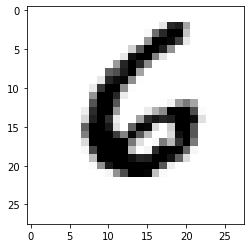

6


In [49]:
import matplotlib.pyplot as plt
index = 90
digit = train_images[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[index])

## 2.2.6 Manipulating tensors in Numpy

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)


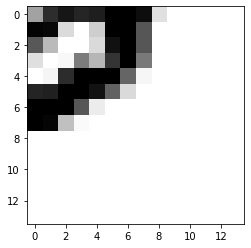

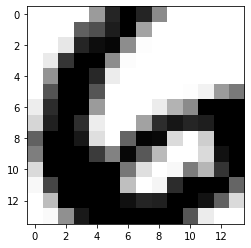

In [50]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice2 = train_images[10:100, :, :]
print(my_slice2.shape)
my_slice3 = train_images[10:100, 0:28, 0:28]
print(my_slice3.shape)
my_slice4 = train_images[:, 14:, 14:]
print(my_slice4.shape)
plt.imshow(my_slice4[index], cmap=plt.cm.binary)
plt.show()
my_slice5 = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice5[index], cmap=plt.cm.binary)
plt.show()

## 2.2.7 The notion of data batches

In [51]:
batch = train_images[:128]
print(batch.shape)
batch = train_images[128:256]
print(batch.shape)

n = 3
batch = train_images[128 * n:128 * (n + 1)]
print(batch.shape)

(128, 28, 28)
(128, 28, 28)
(128, 28, 28)


배치를 다룰 때 첫 번째 축(axis)를 배치 axis(batch dimension)라고 함

## 2.2.8 Real-world examples of data tensors

- Vector data : rank-2 tensor (samples, features)
- Timeseries data (sequence data) : rank-3 tensors (samples, teimesteps, features)
- Images : rank-4 tensors (samples, height, width, channels)
- Video : rank-5 tensor (samples, frames, height, width, channels)

## 2.2.9 Vector data

## 2.2.10 Timeseries data or sequence data

## 2.2.11 Image data

## 2.2.12 Video data

# 2.3 The gears of neural networks: Tensor operations

In [52]:
from tensorflow import keras
keras.layers.Dense(512, activation="relu")

# output = relu(dot(input, W) + b)

## 2.3.1 Element-wise operations

- `relu` 연산과 더하기 연산은 element-wise 연산자

In [53]:
def naive_relu(x):
    assert len(x.shape) == 2 # 2d-tensor
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x


In [54]:
import random
x = np.array([[-2, -1, 0, 2, 3, 4, 5], [-2, -1, 0, 2, 3, 4, 5]])
print(x)
y = naive_relu(x)
print(y)

[[-2 -1  0  2  3  4  5]
 [-2 -1  0  2  3  4  5]]
[[0 0 0 2 3 4 5]
 [0 0 0 2 3 4 5]]


In [55]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [56]:
print(x)
print(y)
z = x + y
z = np.maximum(z, 0.)
print(z)

[[-2 -1  0  2  3  4  5]
 [-2 -1  0  2  3  4  5]]
[[0 0 0 2 3 4 5]
 [0 0 0 2 3 4 5]]
[[ 0.  0.  0.  4.  6.  8. 10.]
 [ 0.  0.  0.  4.  6.  8. 10.]]


In [57]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"Took: {time.time() - t0} s")

Took: 0.008291482925415039 s


In [58]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f"Took: {time.time() - t0} s")

Took: 1.7243328094482422 s


## 2.3.2 Broadcasting

In [59]:
x = np.random.random((32, 10))
y = np.random.random((10,))
print(y.shape)
y = np.expand_dims(y, axis=0) # (1, 10)
print(y.shape)
y = np.concatenate([y] * 32, axis=0) # (32, 10)
print(y.shape)
print(y)

(10,)
(1, 10)
(32, 10)
[[0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 0.86949858
  0.06289222 0.57367958 0.11786196 0.19333484]
 [0.09212745 0.56805643 0.63807929 0.50213729 0.17356606 

In [60]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # numpy matrix
    assert len(y.shape) == 1 # numpy vector
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [61]:
x = np.random.random((32, 10))
y = np.random.random((10,))
Y = naive_add_matrix_and_vector(x, y)
print(Y.shape)
print(Y)

(32, 10)
[[0.54527205 1.11938742 1.41439037 1.40407817 0.20303428 1.38879931
  1.4451004  1.33814887 1.28209083 0.91050687]
 [0.99463295 0.82710384 0.72523829 0.70961995 0.33787453 1.44596511
  1.05502904 1.42554839 1.30702603 1.36465036]
 [0.94006552 0.97884892 1.48849985 0.89956548 0.93885879 1.0121345
  1.21346001 1.99686909 0.66242072 0.94162692]
 [0.70689511 0.48029254 1.33087485 0.90858929 0.29418303 0.60000155
  0.73599036 1.96839973 0.82347993 0.95004815]
 [1.0996811  0.49278961 1.44814499 1.09867573 1.02801277 1.53017357
  1.40497112 1.55928755 1.24108015 0.56786625]
 [1.30781083 1.0620635  0.89738311 1.01488196 0.94987287 1.11165197
  0.70098894 1.45412024 1.04907121 0.93967089]
 [0.50768643 1.168268   0.75739953 0.8711173  0.37369871 1.41349802
  1.39489506 1.74613301 1.09063027 1.50406107]
 [0.69156433 1.10745383 0.72808362 0.85770144 0.90660244 1.24579482
  0.55209607 1.10195085 1.08576296 1.04769259]
 [1.29118483 1.0603007  1.39694925 0.43455127 0.82013618 0.60128002
  1.

`broadcasting`을 사용해서 서로 다른 차원의 tensor에 원소 별(element-wise) maximum을 계산하는 예제

In [62]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(z.shape)

(64, 3, 32, 10)


numpy에서 말하는 axis는 수학/물리에서 말하는 차원에 해당

## 2.3.3 Tensor product

tensor product(dot product), 가장 일반적인 연산자. numpy 에서 dot product는 np.dot 함수를 사용

In [63]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(f"rank-{z.shape}")
print(z)

rank-()
7.353281270382292


In [64]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

z = naive_vector_dot(x, y)
print(z)

7.3532812703822925


- 두 벡터의 dot product 결과는 스칼라
- 두 벡터의 차원이 같은 경우만 dot product 연산이 가능

matrix와 vector 사이의 dot product 연산

In [65]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

x = np.random.random((32, 10))
y = np.random.random((10,))

z = naive_matrix_vector_dot(x, y)
print(z.shape)

z1 = np.dot(x, y)
print(z.shape)
print(z)
print(z1)

(32,)
(32,)
[2.1504813  2.60183709 1.85618259 2.22214212 2.28312637 2.79374638
 2.48162005 2.45394175 2.86080802 2.6237829  2.21983384 2.2554224
 2.10153273 2.84240306 2.5112961  1.96192507 2.59910169 1.98354713
 2.05173042 2.49285343 3.18050355 2.14135746 1.54042784 2.71952904
 3.01252547 2.04661111 1.68153805 2.4122729  3.33323301 3.41311041
 1.62208303 2.84318559]
[2.1504813  2.60183709 1.85618259 2.22214212 2.28312637 2.79374638
 2.48162005 2.45394175 2.86080802 2.6237829  2.21983384 2.2554224
 2.10153273 2.84240306 2.5112961  1.96192507 2.59910169 1.98354713
 2.05173042 2.49285343 3.18050355 2.14135746 1.54042784 2.71952904
 3.01252547 2.04661111 1.68153805 2.4122729  3.33323301 3.41311041
 1.62208303 2.84318559]


In [66]:
# x[a, b], y[c, d]
# a == c
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

x = np.random.random((10, 32))
y = np.random.random((32, 10))
z = naive_matrix_dot(x, y)
print(z.shape)
z1 = np.dot(x, y)
print(z1.shape)

(10, 10)
(10, 10)


## 2.3.4 Tensor reshaping

In [67]:
print(train_images.shape)
train_images = train_images.reshape((60000, 28 * 28))
print(train_images.shape)

(60000, 28, 28)
(60000, 784)


In [72]:
x = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.],
    [6., 7.],
])
print(x.shape)
x = x.reshape((8, 1))
print(x.shape)
x
x = x.reshape((2, 4))
x
print(x.shape)

(4, 2)
(8, 1)
(2, 4)


In [73]:
x = np.zeros((300, 20))
print(x.shape)
x = np.transpose(x)
print(x.shape)

(300, 20)
(20, 300)


## 2.3.5 Geometric interpretation of tensor operations

## 2.3.6 A Geometric interpretation of deep learning